In [2]:
!pip install -q fer
from fer import Video
from fer import FER
import os
import sys
import pandas as pd

     |████████████████████████████████| 810 kB 4.2 MB/s 
     |████████████████████████████████| 2.3 MB 26.1 MB/s 


In [8]:
location_videofile = "damEmotion.mp4"

In [10]:
# Build the Face detection detector
face_detector = FER(mtcnn=True)
# Input the video for processing
input_video = Video(location_videofile)

In [11]:
processing_data = input_video.analyze(face_detector, display=False)

05-10-2021:07:40:53,395 INFO     [classes.py:200] 30.00 fps, 396 frames, 13.20 seconds
05-10-2021:07:40:53,396 INFO     [classes.py:207] Making directories at output


100%|██████████| 396/396 [06:36<00:00,  1.00s/frames]


05-10-2021:07:47:29,874 INFO     [classes.py:321] Completed analysis: saved to output/damEmotion_output.mp4
05-10-2021:07:47:29,875 INFO     [classes.py:327] Starting to Zip
05-10-2021:07:47:29,933 INFO     [classes.py:338] Compressing: 12%
05-10-2021:07:47:29,969 INFO     [classes.py:338] Compressing: 25%
05-10-2021:07:47:30,5 INFO     [classes.py:338] Compressing: 37%
05-10-2021:07:47:30,41 INFO     [classes.py:338] Compressing: 50%
05-10-2021:07:47:30,81 INFO     [classes.py:338] Compressing: 63%
05-10-2021:07:47:30,116 INFO     [classes.py:338] Compressing: 75%
05-10-2021:07:47:30,150 INFO     [classes.py:338] Compressing: 88%
05-10-2021:07:47:30,193 INFO     [classes.py:339] Zip has finished


In [12]:
vid_df = input_video.to_pandas(processing_data)
vid_df = input_video.get_first_face(vid_df)
vid_df = input_video.get_emotions(vid_df)

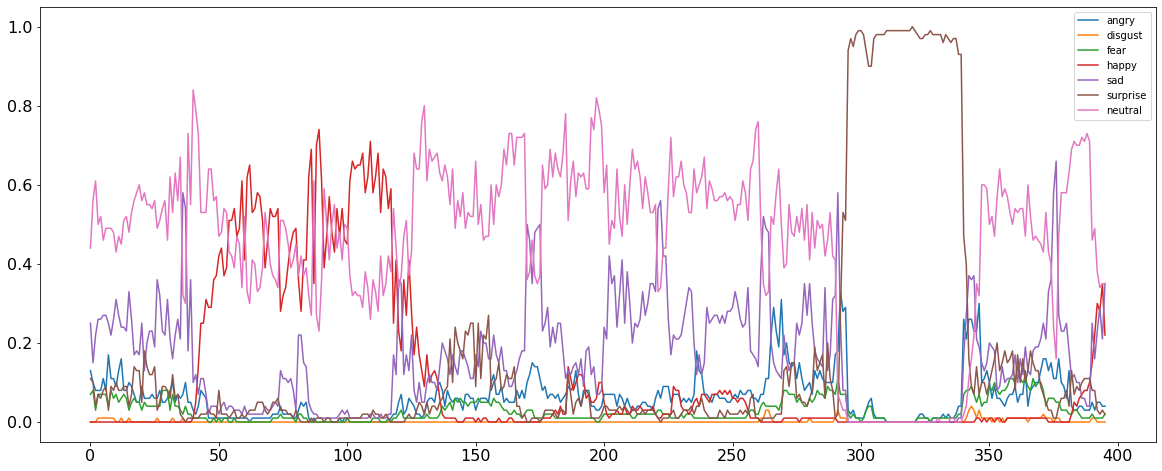

In [13]:
pltfig = vid_df.plot(figsize=(20, 8), fontsize=16).get_figure()

In [14]:
angry = sum(vid_df.angry)
disgust = sum(vid_df.disgust)
fear = sum(vid_df.fear)
happy = sum(vid_df.happy)
sad = sum(vid_df.sad)
surprise = sum(vid_df.surprise)
neutral = sum(vid_df.neutral)

In [15]:
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
emotions_values = [angry, disgust, fear, happy, sad, surprise, neutral]

In [16]:
score_comparisons = pd.DataFrame(emotions, columns = ['Human Emotions'])
score_comparisons['Emotion Value from the Video'] = emotions_values
score_comparisons

,Human Emotions,Emotion Value from the Video
0,Angry,24.88
1,Disgust,0.73
2,Fear,11.23
3,Happy,48.23
4,Sad,64.36
5,Surprise,65.66
6,Neutral,180.04
